# AI-Powered User Behavior Profiling & Threat Risk Scoring System

## Introduction
Modern cybersecurity systems generate large volumes of user activity logs.
Manual analysis is inefficient and traditional rule-based systems fail to detect
unknown or insider threats.

This project applies Artificial Intelligence to learn normal user behavior,
detect anomalies, and assign a threat risk score to support cybersecurity monitoring.

## Problem Statement
Traditional security systems rely on static rules and known attack signatures.
There is a need for an AI-based system that learns behavioral patterns and identifies
suspicious activity dynamically.

## Objectives
- Perform user behavior profiling using AI
- Detect anomalous behavior patterns
- Generate a threat risk score
- Map AI results to cybersecurity use cases


In [9]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

import matplotlib.pyplot as plt


In [10]:
np.random.seed(42)

users = [f"User_{i}" for i in range(1, 21)]

data = {
    "user_id": users,
    "avg_session_duration": np.random.normal(35, 5, 20).tolist(),
    "login_attempts": np.random.randint(1, 5, 20).tolist(),
    "failed_logins": np.random.randint(0, 2, 20).tolist(),
    "data_accessed_MB": np.random.normal(60, 10, 20).tolist()
}

# Inject suspicious behavior
data["avg_session_duration"][5] = 300
data["login_attempts"][5] = 15
data["failed_logins"][5] = 10
data["data_accessed_MB"][5] = 1200

df = pd.DataFrame(data)
df


,user_id,avg_session_duration,login_attempts,failed_logins,data_accessed_MB
0,User_1,37.483571,2,1,68.225449
1,User_2,34.308678,2,1,47.791564
2,User_3,38.238443,3,1,62.088636
3,User_4,42.615149,2,1,40.403299
4,User_5,33.829233,3,0,46.718140
5,User_6,300.000000,15,10,1200.000000
6,User_7,42.896064,3,0,67.384666
7,User_8,38.837174,4,1,61.713683
8,User_9,32.652628,4,1,58.843517
9,User_10,37.712800,1,1,56.988963


## Dataset Description

The dataset represents simulated user behavior logs:
- Average Session Duration (minutes)
- Login Attempts
- Failed Login Attempts
- Data Accessed (MB)

Abnormally high values may indicate compromised accounts,
insider threats, or data exfiltration.


In [11]:
features = df.drop("user_id", axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["behavior_cluster"] = kmeans.fit_predict(scaled_features)

df


,user_id,avg_session_duration,login_attempts,failed_logins,data_accessed_MB,behavior_cluster
0,User_1,37.483571,2,1,68.225449,2
1,User_2,34.308678,2,1,47.791564,2
2,User_3,38.238443,3,1,62.088636,0
3,User_4,42.615149,2,1,40.403299,2
4,User_5,33.829233,3,0,46.718140,2
5,User_6,300.000000,15,10,1200.000000,1
6,User_7,42.896064,3,0,67.384666,0
7,User_8,38.837174,4,1,61.713683,0
8,User_9,32.652628,4,1,58.843517,0
9,User_10,37.712800,1,1,56.988963,2


In [5]:
iso_forest = IsolationForest(contamination=0.15, random_state=42)
df["anomaly_flag"] = iso_forest.fit_predict(scaled_features)

df["anomaly_flag"] = df["anomaly_flag"].map({
    1: "Normal",
    -1: "Anomalous"
})

df["anomaly_score"] = iso_forest.decision_function(scaled_features)
df


,user_id,avg_session_duration,login_attempts,failed_logins,data_accessed_MB,behavior_cluster,anomaly_flag,anomaly_score
0,User_1,37.483571,2,1,68.225449,2,Normal,0.064436
1,User_2,34.308678,2,1,47.791564,2,Normal,0.087896
2,User_3,38.238443,3,1,62.088636,0,Normal,0.100292
3,User_4,42.615149,2,1,40.403299,2,Anomalous,-0.013363
4,User_5,33.829233,3,0,46.718140,2,Normal,0.076827
5,User_6,300.000000,15,10,1200.000000,1,Anomalous,-0.342360
6,User_7,42.896064,3,0,67.384666,0,Anomalous,-0.005379
7,User_8,38.837174,4,1,61.713683,0,Normal,0.040648
8,User_9,32.652628,4,1,58.843517,0,Normal,0.070800
9,User_10,37.712800,1,1,56.988963,2,Normal,0.059088


In [6]:
def calculate_risk(row):
    score = 0

    if row["anomaly_flag"] == "Anomalous":
        score += 40
    score += row["failed_logins"] * 5
    score += row["login_attempts"] * 2
    score += row["data_accessed_MB"] / 50

    return min(score, 100)

df["threat_risk_score"] = df.apply(calculate_risk, axis=1)


In [7]:
def risk_level(score):
    if score >= 70:
        return "High Risk"
    elif score >= 40:
        return "Medium Risk"
    else:
        return "Low Risk"

df["risk_level"] = df["threat_risk_score"].apply(risk_level)
df


,user_id,avg_session_duration,login_attempts,failed_logins,data_accessed_MB,behavior_cluster,anomaly_flag,anomaly_score,threat_risk_score,risk_level
0,User_1,37.483571,2,1,68.225449,2,Normal,0.064436,10.364509,Low Risk
1,User_2,34.308678,2,1,47.791564,2,Normal,0.087896,9.955831,Low Risk
2,User_3,38.238443,3,1,62.088636,0,Normal,0.100292,12.241773,Low Risk
3,User_4,42.615149,2,1,40.403299,2,Anomalous,-0.013363,49.808066,Medium Risk
4,User_5,33.829233,3,0,46.718140,2,Normal,0.076827,6.934363,Low Risk
5,User_6,300.000000,15,10,1200.000000,1,Anomalous,-0.342360,100.000000,High Risk
6,User_7,42.896064,3,0,67.384666,0,Anomalous,-0.005379,47.347693,Medium Risk
7,User_8,38.837174,4,1,61.713683,0,Normal,0.040648,14.234274,Low Risk
8,User_9,32.652628,4,1,58.843517,0,Normal,0.070800,14.176870,Low Risk
9,User_10,37.712800,1,1,56.988963,2,Normal,0.059088,8.139779,Low Risk


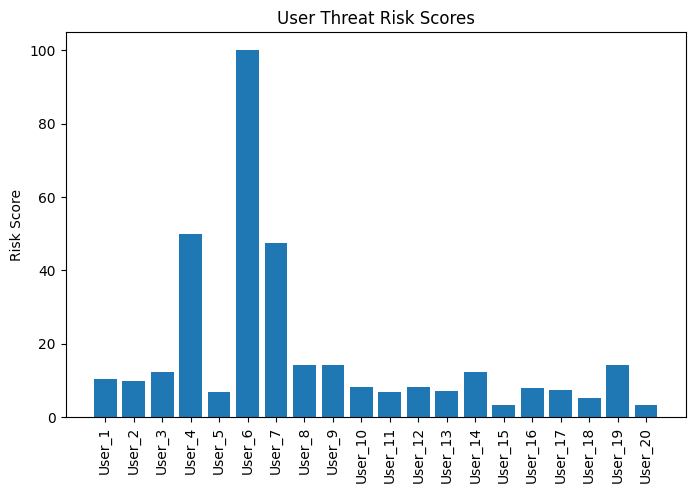

In [8]:
plt.figure(figsize=(8,5))
plt.bar(df["user_id"], df["threat_risk_score"])
plt.xticks(rotation=90)
plt.title("User Threat Risk Scores")
plt.ylabel("Risk Score")
plt.show()


## Cybersecurity Interpretation

High-risk users may indicate:
- Compromised credentials
- Insider threats
- Excessive data access
- Brute-force login attempts

This AI-based approach supports User and Entity Behavior Analytics (UEBA)
commonly used in SOC and cloud security platforms.


## Conclusion

This project demonstrates an AI-powered user behavior analytics system that
profiles user activity, detects anomalies, and assigns threat risk scores.
It highlights how machine learning enhances cybersecurity monitoring in
modern cloud and enterprise environments.


In [12]:
import pandas as pd

df = pd.read_csv("/content/user_activity_logs.csv")
df.head()


,user_id,avg_session_duration,login_attempts,failed_logins,data_accessed_MB
0,User_1,30,1,0,50
1,User_2,28,2,0,55
2,User_3,32,1,1,48
3,User_4,35,2,0,52
4,User_5,29,1,0,54


In [18]:

import sys
sys.path.append("/content")


In [20]:
!mkdir src

In [22]:
!ls

anomaly_detection.py	risk_scoring.py  src
feature_engineering.py	sample_data	 user_activity_logs.csv


In [23]:
!mv anomaly_detection.py feature_engineering.py risk_scoring.py src/


In [24]:
!ls src



anomaly_detection.py  feature_engineering.py  risk_scoring.py


In [27]:
import sys
sys.path.append("/content")
from src.feature_engineering import scale_features
from src.anomaly_detection import behavior_clustering, detect_anomalies
from src.risk_scoring import calculate_risk, risk_level
import pandas as pd

df = pd.read_csv("/content/user_activity_logs.csv")

scaled_features = scale_features(df)
df["behavior_cluster"] = behavior_clustering(scaled_features)

flags, scores = detect_anomalies(scaled_features)
df["anomaly_flag"] = flags
df["anomaly_score"] = scores

df["threat_risk_score"] = df.apply(calculate_risk, axis=1)
df["risk_level"] = df["threat_risk_score"].apply(risk_level)

df


,user_id,avg_session_duration,login_attempts,failed_logins,data_accessed_MB,behavior_cluster,anomaly_flag,anomaly_score,threat_risk_score,risk_level
0,User_1,30,1,0,50,2,1,0.114879,3.00,Low Risk
1,User_2,28,2,0,55,0,1,0.090329,5.10,Low Risk
2,User_3,32,1,1,48,2,1,0.002608,7.96,Low Risk
3,User_4,35,2,0,52,0,1,0.042104,5.04,Low Risk
4,User_5,29,1,0,54,2,1,0.068885,3.08,Low Risk
5,User_6,300,15,10,1200,1,-1,-0.313215,100.00,High Risk
6,User_7,31,1,0,49,2,1,0.101472,2.98,Low Risk
7,User_8,27,2,0,56,0,1,0.053011,5.12,Low Risk
8,User_9,34,2,1,53,0,-1,-0.001404,50.06,Medium Risk
9,User_10,33,1,0,51,2,1,0.095041,3.02,Low Risk


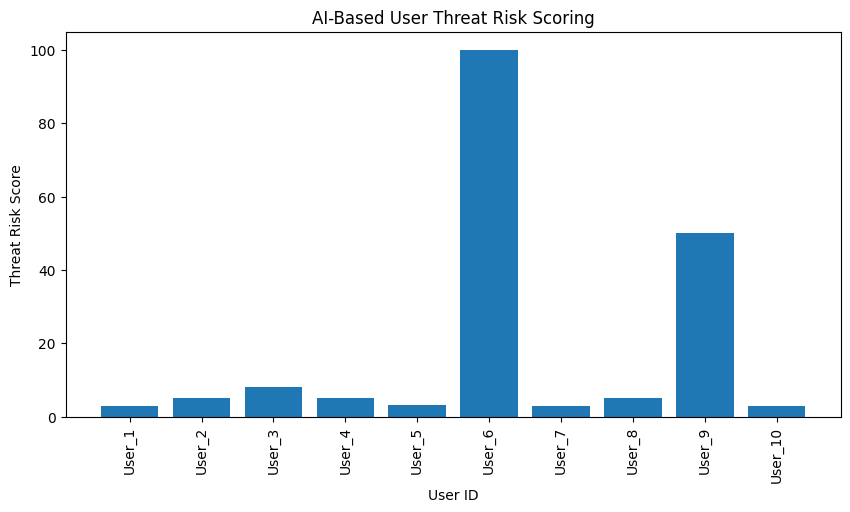

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df["user_id"], df["threat_risk_score"])
plt.xticks(rotation=90)
plt.xlabel("User ID")
plt.ylabel("Threat Risk Score")
plt.title("AI-Based User Threat Risk Scoring")
plt.show()


In [29]:
high_risk_users = df[df["risk_level"] == "High Risk"]
high_risk_users[["user_id", "threat_risk_score", "risk_level"]]


,user_id,threat_risk_score,risk_level
5,User_6,100.0,High Risk


## Results Interpretation

The AI model successfully profiles user behavior and assigns threat risk scores.
Users classified as High Risk exhibit abnormal activity patterns such as excessive
login attempts, high failed login counts, and unusually large data access.

This approach mirrors real-world User and Entity Behavior Analytics (UEBA)
used in cloud security and SOC environments.


## Why This Is an AI-Based System

- The model learns normal behavior patterns automatically
- No predefined attack signatures are required
- Unsupervised learning adapts to unknown threats
- Risk scores are dynamically generated using learned patterns

This makes the system suitable for detecting insider threats and zero-day behaviors.


In [30]:
df.to_csv("/content/threat_scores.csv", index=False)


## Conclusion

This project demonstrates an AI-powered User Behavior Analytics system that combines
machine learning, anomaly detection, and threat risk scoring. By mapping AI outputs
to cybersecurity use cases, the system highlights how AI can enhance modern cloud
security monitoring and SOC operations.
